<a href="https://colab.research.google.com/github/priyankamallick/Insurance_Prediction./blob/main/Cx_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
# Reading the csv File
df=pd.read_csv('/content/train.csv')

In [68]:
# To see the first 5 rows
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [69]:
df.shape

(45211, 11)

In [70]:
# Describing the data
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [71]:
df.y=df.y.map({'yes':1,'no':0})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


# Checking if the data is Balanced or Imbalanced

Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %


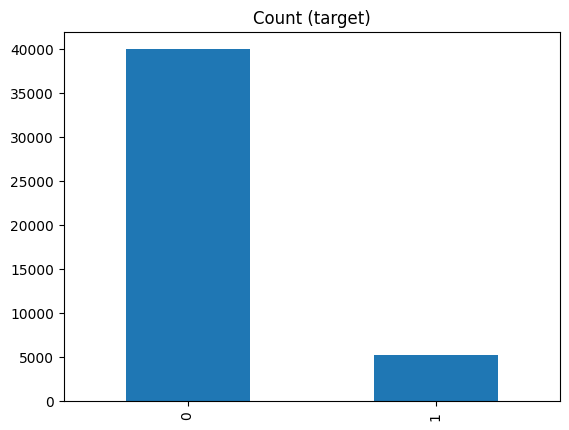

In [72]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [73]:
df.describe()

,age,day,dur,num_calls,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,0.116985
std,10.618762,8.322476,257.527812,3.098021,0.321406
min,18.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,1.000000


# **Data Cleaning**

In [74]:
# Dropping the Null Values
df = df.dropna()
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [75]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [76]:
# Dropping Duplicates
df=df.drop_duplicates()
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [77]:
#Type of data
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [78]:
# Checking for Outliers
# age column
q3 = df.age.quantile(0.75)
q1=df.age.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
#df.age=df.age.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 70.5 lower_threshold: 10.5


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [81]:
# day column
q3 = df['day'].quantile(0.75) 
q1=  df['day'].quantile(0.25)
iqr=q3-q1
upper_threshold = df['day'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['day'].quantile(0.25) - (1.5 * iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)

upper_threshold: 40.5 lower_threshold: -11.5


In [82]:
# dur column
q3 = df.dur.quantile(0.75)
q1=df.dur.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
df.dur=df.dur.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 643.0 lower_threshold: -221.0


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.763898,0.117000
std,10.619130,8.32234,176.75476,3.098189,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,63.000000,1.000000


In [83]:
#num_calls column
q3 = df.num_calls.quantile(0.75)
q1=df.num_calls.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
df.num_calls=df.num_calls.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 6.0 lower_threshold: -2.0


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235,0.117000
std,10.619130,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,6.000000,1.000000


In [84]:
# Checking for Unique Values
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[0 1]


In [85]:
df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235,0.117000
std,10.619130,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,6.000000,1.000000


# **EDA**

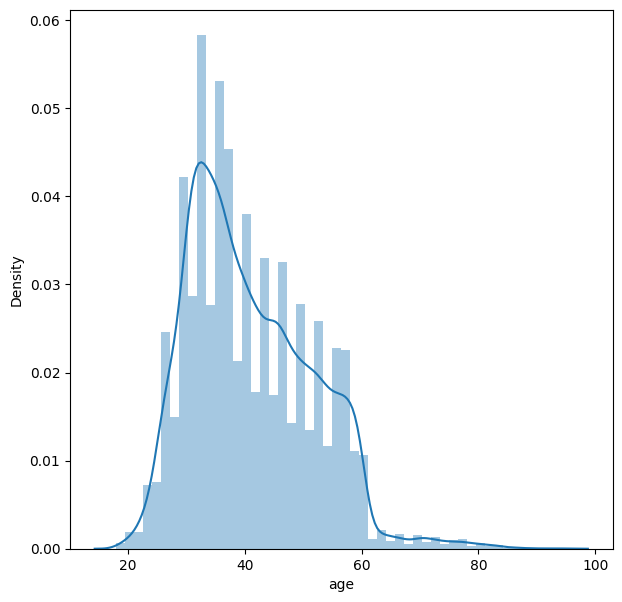

In [86]:
# Univariant Analysis
# Distribution of age column
plt.figure(figsize=(7,7))
sns.distplot(df.age)
plt.show()

Interpretation: Company targets more people aged between 30-40 to sell their insurance plans.
Whereas, people aged less than 25 years and more than 60 years are less targeted by the company for the insurance.

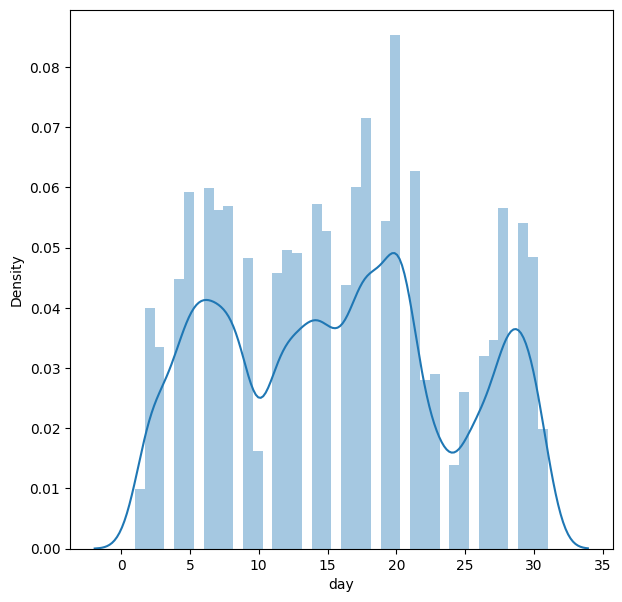

In [87]:
# Distribution of day column
plt.figure(figsize=(7,7))
sns.distplot(df.day)
plt.show()

Interpretation: Most number of calls are placed in the middle of the month.

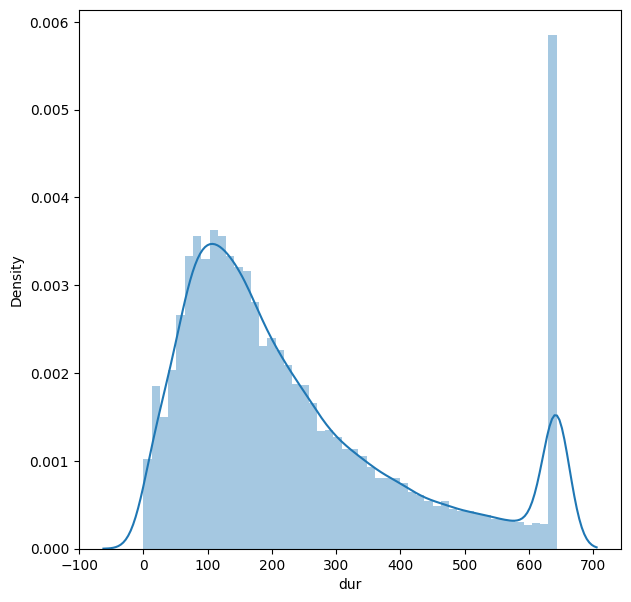

In [88]:
# Distribution of duration column
plt.figure(figsize=(7,7))
sns.distplot(df.dur)
plt.show()

Interpretation: Maximum number of calls lasted less than 1000 seconds.

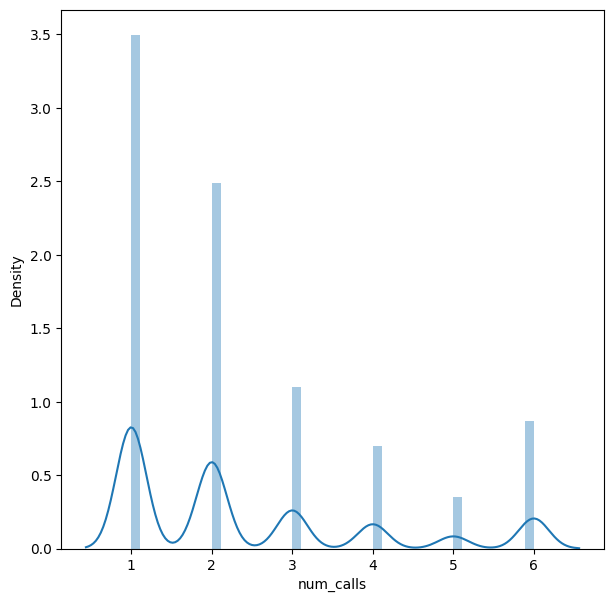

In [89]:
# Distribution of num_calls column
plt.figure(figsize=(7,7))
sns.distplot(df.num_calls)
plt.show()

Interpretation: Most of the people are contacted only once or twice by the company.

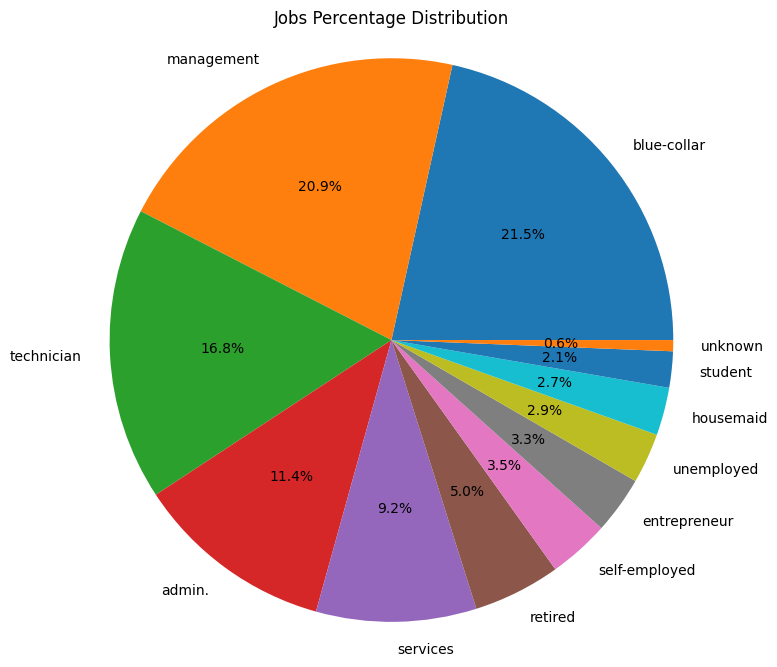

In [90]:
import matplotlib.pyplot as plt
# Distribution of job column
# Getting the value counts for the 'job' column of our DataFrame
job_counts = df['job'].value_counts()

# Creating a new DataFrame with the value counts and index (job title)
job_df = pd.DataFrame({'job_title': job_counts.index, 'count': job_counts.values})

# Setting the figure size and plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_df['count'], labels=job_df['job_title'], autopct='%1.1f%%')
plt.title('Jobs Percentage Distribution')
plt.axis('equal')

# Displaying the pie chart
plt.show()

Interpretation: Blue collar and management people are targeted the most by the insurance company. Whereas, students are least targeted for the insurance plans.

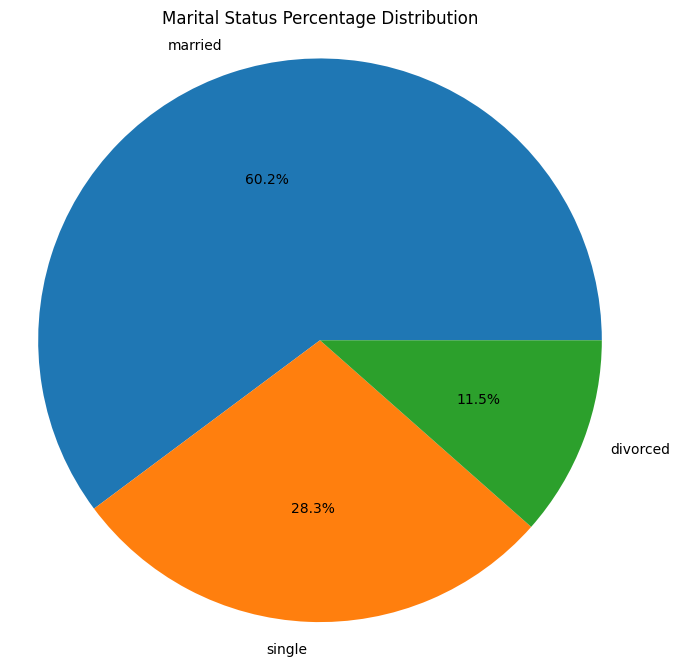

In [91]:
import matplotlib.pyplot as plt
# Distribution of marital column
# Getting the value counts for the 'marital' column of our DataFrame
marital_counts = df['marital'].value_counts()

# Creating a new DataFrame with the value counts and index (marital status)
marital_df = pd.DataFrame({'marital_status': marital_counts.index, 'count': marital_counts.values})

# Setting the figure size and plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_df['count'], labels=marital_df['marital_status'], autopct='%1.1f%%')
plt.title('Marital Status Percentage Distribution')
plt.axis('equal')

# Displaying the pie chart
plt.show()

Interpretation: Married people are targeted the most. Whereas, divorced people are least targeted.

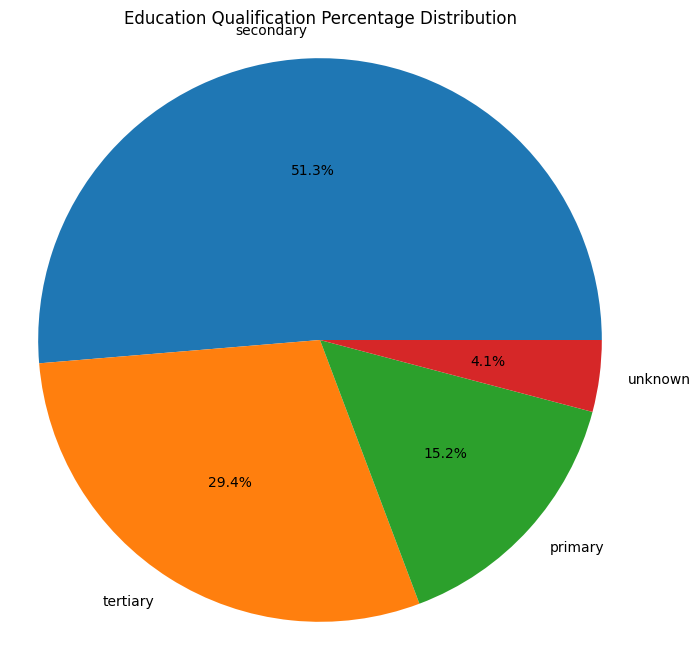

In [92]:
import matplotlib.pyplot as plt
# Distribution of education_qual column
# Getting the value counts for the 'education_qual' column of our DataFrame
education_counts = df['education_qual'].value_counts()

# Creating a new DataFrame with the value counts and index (education qual)
education_df = pd.DataFrame({'education_qual': education_counts.index, 'count': education_counts.values})

# Setting the figure size and plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_df['count'], labels=education_df['education_qual'], autopct='%1.1f%%')
plt.title('Education Qualification Percentage Distribution')
plt.axis('equal')

# Displaying the pie chart
plt.show()

Interpretation: Secondary people are targeted the most for insurance followed by tertiary and primary.

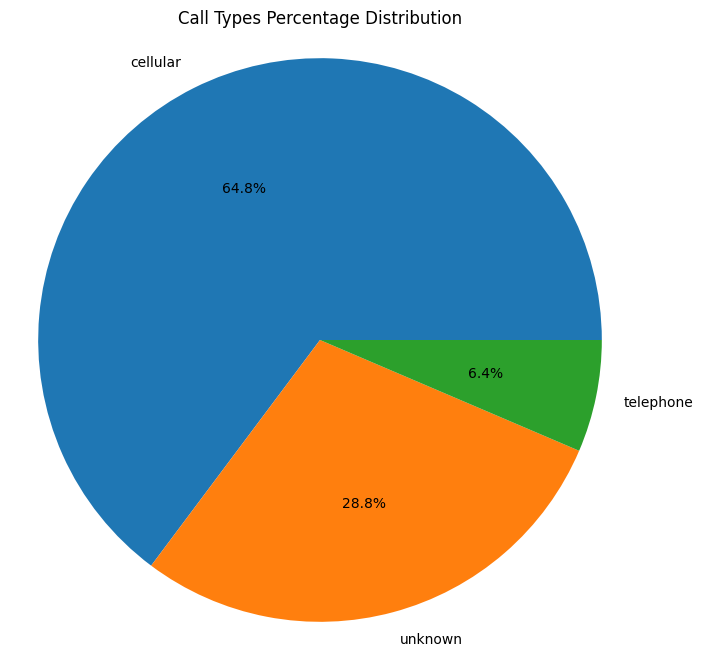

In [93]:
import matplotlib.pyplot as plt
# Distribution of call_type column
# Getting the value counts for the 'call_type' column of our DataFrame
call_type_counts = df['call_type'].value_counts()

# Creating a new DataFrame with the value counts and index (call type)
call_type_df = pd.DataFrame({'call_type': call_type_counts.index, 'count': call_type_counts.values})

# Setting the figure size and plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(call_type_df['count'], labels=call_type_df['call_type'], autopct='%1.1f%%')
plt.title('Call Types Percentage Distribution')
plt.axis('equal')

# Displaying the pie chart
plt.show()

Interpretation: Cellur mode is most used for contacting people for insurance.

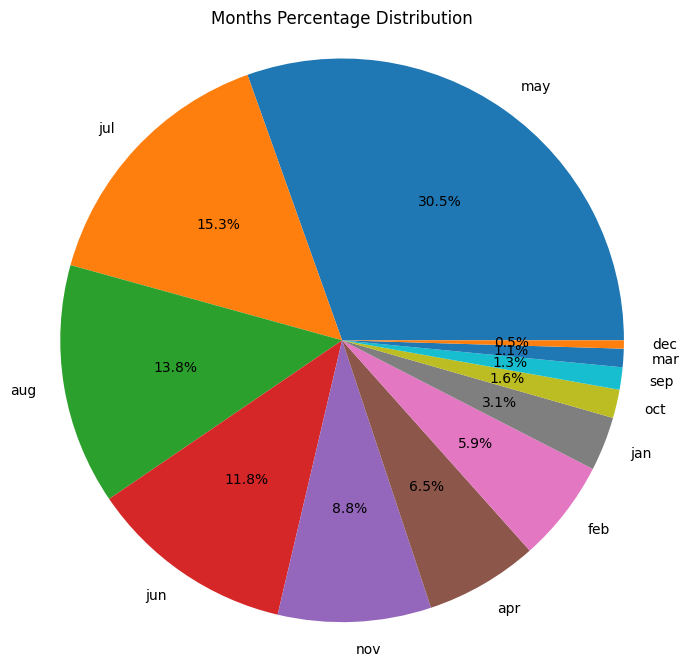

In [94]:
import matplotlib.pyplot as plt
# Distribution of month column
# Getting the value counts for the 'mon' column of our DataFrame
month_counts = df['mon'].value_counts()

# Creating a new DataFrame with the value counts and index (month)
month_df = pd.DataFrame({'month': month_counts.index, 'count': month_counts.values})

# Setting the figure size and plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_df['count'], labels=month_df['month'], autopct='%1.1f%%')
plt.title('Months Percentage Distribution')
plt.axis('equal')

# Displaying the pie chart
plt.show()

Interpretation: May month is when maxmium calls are generated by the company for new insurers. Whereas, december shows the least no of calls placed by the company

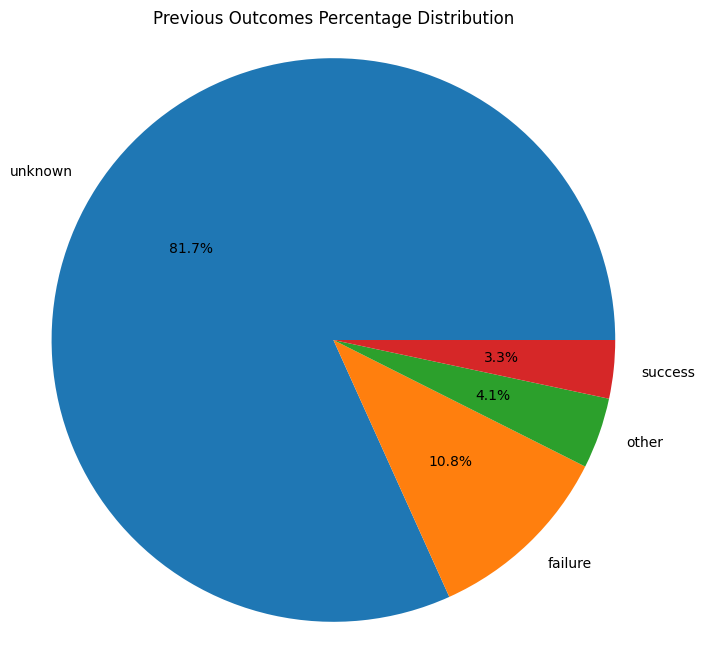

In [95]:
import matplotlib.pyplot as plt
# Distribution of prev_outcome column
# Getting the value counts for the 'prev_outcome' column of our DataFrame
prev_outcome_counts = df['prev_outcome'].value_counts()

# Creating a new DataFrame with the value counts and index (previous outcome)
prev_outcome_df = pd.DataFrame({'prev_outcome': prev_outcome_counts.index, 'count': prev_outcome_counts.values})

# Setting the figure size and plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(prev_outcome_df['count'], labels=prev_outcome_df['prev_outcome'], autopct='%1.1f%%')
plt.title('Previous Outcomes Percentage Distribution')
plt.axis('equal')

# Displaying the pie chart
plt.show()


Interpretation: More unknown as status than failure and success.

# The missing values in some columns have been represented as unknown.

In [96]:
# Unknown represents missing data.

In [97]:
cat_var=['job','education_qual']
for column in cat_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

# Feature Vs Target Variable

In [98]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0


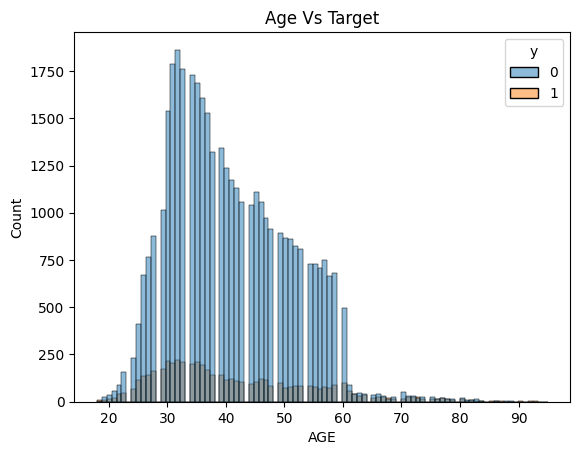

In [99]:
# age vs y (numerical data)
sns.histplot(x='age',hue='y',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")
plt.show()

Interpretation: Middle aged people have insured themselves more than the young and aged ones.


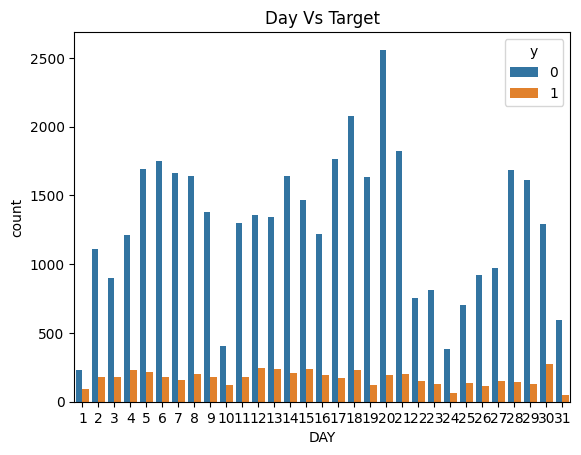

In [100]:
# day vs y (numerical data)
sns.countplot(x='day',hue='y',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")
plt.show()

Interpretation: Middle of the month has the highest target variable.

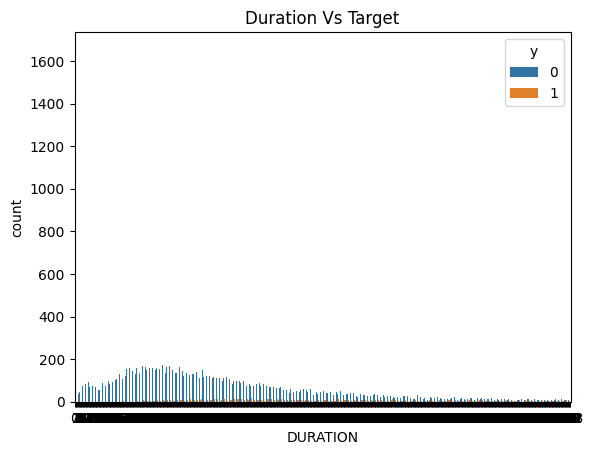

In [101]:
# duration vs y (numerical data)
sns.countplot(x='dur',hue='y',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION")
plt.show()

Interpretation: Duration of the call plays a major role in subscription.

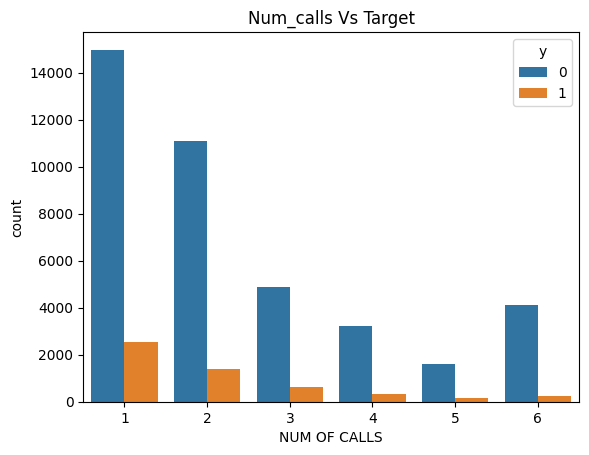

In [102]:
# num_calls vs y (numerical data)
sns.countplot(x='num_calls',hue='y',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NUM OF CALLS")
plt.show()

Interpretation: Most of the people are contacted only once or twice by the company.

<Axes: xlabel='job'>

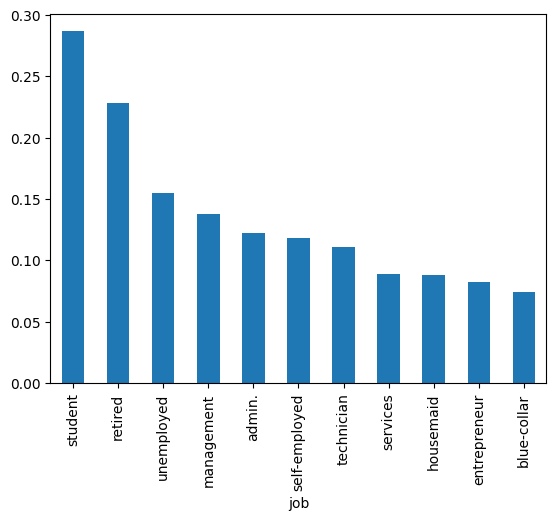

In [103]:
# job vs y (categorical data)
df.groupby('job')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Interpretation: STUDENTS are targeted to subscribe the insurance more than the others followed by the RETIRED people.

<Axes: xlabel='marital'>

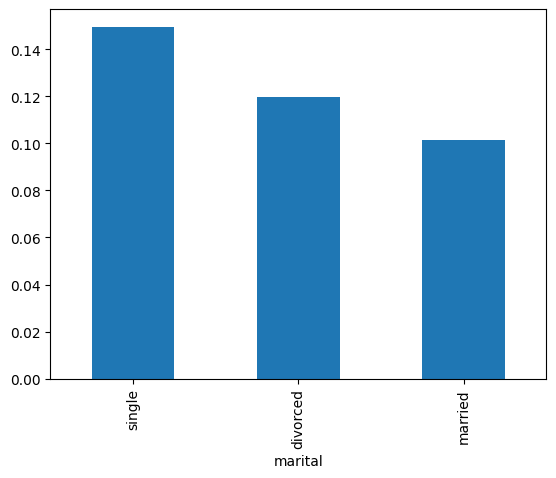

In [104]:
# marital vs y (categorical data)
df.groupby('marital')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Interpretation: SINGLES are targeted to subscribe the insurance more than the others.

<Axes: xlabel='education_qual'>

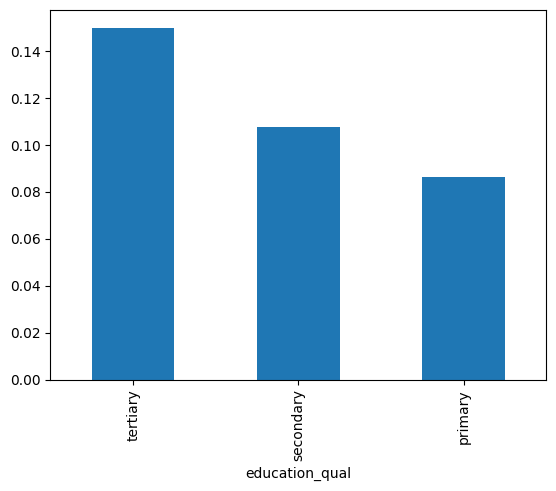

In [105]:
# education_qual vs y (categorical data)
df.groupby('education_qual')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Interpretation: TERTIARY people are targeted to subscribe the insurance more than the others.

<Axes: xlabel='call_type'>

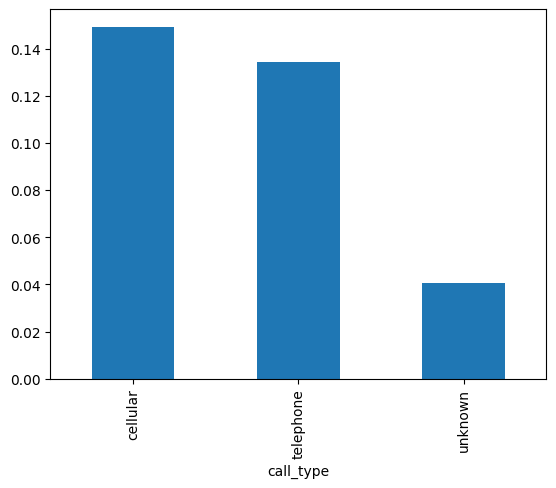

In [106]:
# call_type vs y (categorical data)
df.groupby('call_type')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Interpretation: CELLULAR people are targeted to subscribe the insurance more than the others.

<Axes: xlabel='mon'>

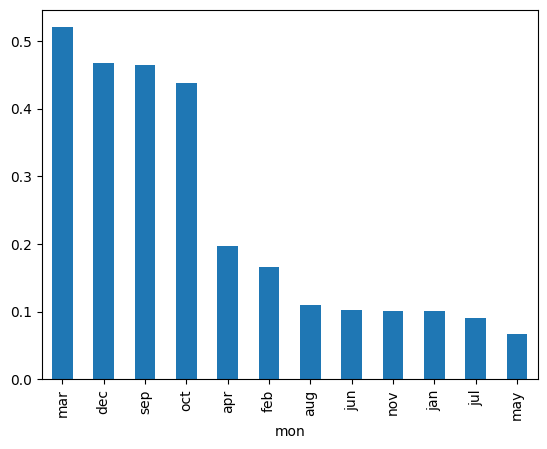

In [107]:
# month vs y (categorical data)
df.groupby('mon')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Interpretation: MARCH month has the highest trend to subscribe the insurance more than the others. Because, the month of march being the end of financial year in INDIA follwed by and the month of DECEMBER as its the financial year in FOREIGN COUNTRIES.

<Axes: xlabel='prev_outcome'>

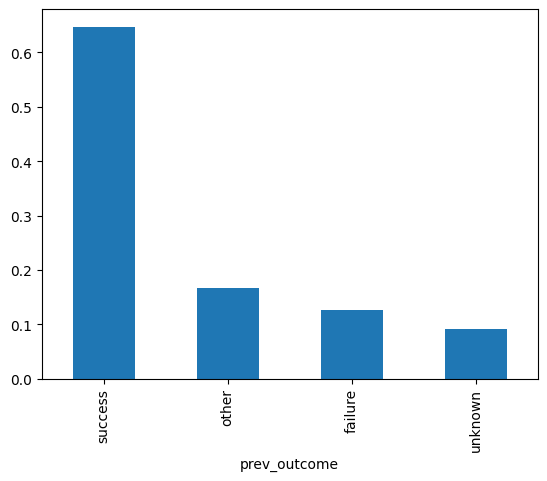

In [108]:
# prev_outcome vs y (categorical data)
df.groupby('prev_outcome')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Interpretation: SUCCESS people are targeted to subscribe the insurance more than the others.

# Encoding The Data

In [109]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
df['marital'] = df['marital'].map({'married':1,'single':2,'divorced':3})
df['prev_outcome']=df['prev_outcome'].map({'unknown':1,'failure':2,'other':3,'success':4})

# Target & Feature Selection

In [110]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day',
       'dur', 'num_calls','marital','prev_outcome','mon']].values
y = df['y'].values

# Splitting

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

#Smoteenn

In [112]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_train, y_train = smt.fit_resample(X_train, y_train) 

#Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score

logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train)
y_pred = logistic.predict(X_test)
print("Training Accuracy :",logistic.score(X_train,y_train))
print("Testing Accuracy :",logistic.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.8732831274643544
Testing Accuracy : 0.7293440991040814
F1 Score : 0.4254519840338108
ROC AUC Score : 0.7791085123345198


# Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test,y_pred)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy,"ROC AUC Score :", roc, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7851176349672042 ROC AUC Score : 0.7216774249841866  Cross val score :  0.7847815071097171
Depth  :  2  Training Accuracy :  0.7986657447722983 ROC AUC Score : 0.7379635035949952  Cross val score :  0.7985909448215119
Depth  :  3  Training Accuracy :  0.8545960794573281 ROC AUC Score : 0.7902618161368681  Cross val score :  0.8543530936899323
Depth  :  4  Training Accuracy :  0.860949675779717 ROC AUC Score : 0.7979290765110768  Cross val score :  0.8600526940049203
Depth  :  5  Training Accuracy :  0.8704240091192794 ROC AUC Score : 0.8190076826410957  Cross val score :  0.8692653106204533
Depth  :  6  Training Accuracy :  0.8934464522639358 ROC AUC Score : 0.8113380829936709  Cross val score :  0.88911095435272
Depth  :  7  Training Accuracy :  0.9066208211088894 ROC AUC Score : 0.8168787685691508  Cross val score :  0.9020425578779262
Depth  :  8  Training Accuracy :  0.9188608375534917 ROC AUC Score : 0.8284423808935649  Cross val score :  0.9134

In [116]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9962625903985948
Testing Accuracy : 0.8251299634996129
F1 Score : 0.5073231536304145
ROC AUC Score : 0.7963535175183494


# Feature Importance

In [119]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# assuming X_test is a numpy array
X_test_df = pd.DataFrame(X_test, columns=['age','job','marital','education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome'])

dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

importance = dt.feature_importances_
feature_importances = list(zip(X_test_df.columns, importance))
feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature Importances in Descending Order:")
for feature, importance in feature_importances:
    print(feature, ":", importance)

Feature Importances in Descending Order:
day : 0.4956231049243327
prev_outcome : 0.14689006993000067
education_qual : 0.08386052026365895
call_type : 0.07865870259070615
age : 0.0628843798859803
num_calls : 0.04766194941511712
job : 0.03367532967943156
mon : 0.026900442751425807
marital : 0.014223255415835289
dur : 0.009622245143511357


#  KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_train, y_train) 
  print("K value  : " , i, " Train score : ", knn.score(X_train,y_train) , " Cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) 

K value  :  1  Train score :  1.0  Cross val score :  0.9953656560569124
K value  :  2  Train score :  0.9998505036159437  Cross val score :  0.9954030217728885
K value  :  3  Train score :  0.9970848205109039  Cross val score :  0.9865827364456138
K value  :  4  Train score :  0.9968979500308336  Cross val score :  0.9880029898159656
K value  :  5  Train score :  0.9908994076205782  Cross val score :  0.9769775650668372
K value  :  6  Train score :  0.9916095154448452  Cross val score :  0.978808939083233
K value  :  7  Train score :  0.983667520041859  Cross val score :  0.9685684003856061
K value  :  8  Train score :  0.9848634911143087  Cross val score :  0.9699886816903313
K value  :  9  Train score :  0.9763795713191187  Cross val score :  0.9605329871426459
K value  :  10  Train score :  0.977276549623456  Cross val score :  0.9616916316160118
K value  :  20  Train score :  0.9490777941808533  Cross val score :  0.9367819259856434
K value  :  30  Train score :  0.933156429278866

In [121]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training Accuracy :",knn.score(X_train,y_train))
print("Testing Accuracy :",knn.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9968979500308336
Testing Accuracy : 0.7845371087269107
F1 Score : 0.4487832484436899
ROC AUC Score : 0.7648560224121089


# XG Boost

In [122]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0) # initialising the model
  model.fit(X_train,y_train) #training the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9131052267673275  Cross-Val score :  0.9099658530221777
Learning rate :  0.02  Train score :  0.9249715022517893  Cross-Val score :  0.9206362633138714
Learning rate :  0.03  Train score :  0.9313998467662064  Cross-Val score :  0.9272328049267295
Learning rate :  0.04  Train score :  0.9372302057443985  Cross-Val score :  0.9327642612657232
Learning rate :  0.05  Train score :  0.942537327378394  Cross-Val score :  0.937585639804694
Learning rate :  0.06  Train score :  0.9461065535477361  Cross-Val score :  0.9406317086143181
Learning rate :  0.07  Train score :  0.9500308336292116  Cross-Val score :  0.9444625971313074
Learning rate :  0.08  Train score :  0.9518434772858931  Cross-Val score :  0.9458454743102933
Learning rate :  0.09  Train score :  0.95462784743894  Cross-Val score :  0.9479010740487158
Learning rate :  0.1  Train score :  0.9569637284398184  Cross-Val score :  0.9494894085427223
Learning rate :  0.11  Train score :  0.95829

In [123]:
xg = XGBClassifier(learning_rate = 0.15, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("Training Accuracy :",xg.score(X_train,y_train))
print("Testing Accuracy :",xg.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9647749145067553
Testing Accuracy : 0.8355270434686428
F1 Score : 0.5594074074074075
ROC AUC Score : 0.8546723005722797


# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")  #max_depth=log(no of features)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [125]:
# doing cross validation to get best value of max _depth to prevent overfitting
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # telling the DT to not grow past the given threshold
  # Fitting dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9962999644946088  Cross val score :  0.8073179014078645
Depth  :  2  Training Accuracy :  0.9962999644946088  Cross val score :  0.8560534904139008
Depth  :  3  Training Accuracy :  0.9962999644946088  Cross val score :  0.8704801834953108
Depth  :  4  Training Accuracy :  0.9962999644946088  Cross val score :  0.8837104648307639
Depth  :  5  Training Accuracy :  0.9962999644946088  Cross val score :  0.8964550372518832
Depth  :  6  Training Accuracy :  0.9962999644946088  Cross val score :  0.9042663155595297
Depth  :  7  Training Accuracy :  0.9962999644946088  Cross val score :  0.9129931813591693
Depth  :  8  Training Accuracy :  0.9962999644946088  Cross val score :  0.9210660196786487
Depth  :  9  Training Accuracy :  0.9962999644946088  Cross val score :  0.9287092063872503
Depth  :  10  Training Accuracy :  0.9962999644946088  Cross val score :  0.935623407216957


In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Training Accuracy :",rf.score(X_train,y_train))
print("Testing Accuracy :",rf.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,predictions))
print("ROC AUC Score :", roc_auc_score(y_test,predictions))

Training Accuracy : 0.9445181544671388
Testing Accuracy : 0.7984736201747594
F1 Score : 0.5151676423629591
ROC AUC Score : 0.8433282875210066


# Conclusion

Logistic Regression => 0.7791085123345198

Decision Tree => 0.7963535175183494

KNN Classifier => 0.7648560224121089

XG Boost => 0.8546723005722797

Random Forest => 0.8433282875210066

Hence, XG Boost is the best model for Customer Conversion Prediction with 0.8504064019357953 AUROC Score